In [1]:
%matplotlib inline 


import pandas as pd
import numpy as np
import sklearn.model_selection
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")


In [2]:
stats2018 = pd.read_csv('Total2018_full')


In [3]:
stats2018.drop('Unnamed: 0', axis = 1, inplace = True)
stats2018.drop('Unnamed: 0.1', axis = 1, inplace = True)

In [4]:
stats2018.head()

,Rk,Tm,2018-19,Name,Pos,G,GS,FG,FG%,3P,...,PER,MP,TRB%,AST%,TOV%,OWS,DWS,M/G,AST/TOV,dollar_per_p/g
0,1,GSW,37457154,Stephen Curry,PG,51,51,8.4,0.495,4.2,...,28.2,1631,9.0,30.3,13.3,7.2,1.8,31.980392,2.033333,1.418832e+06
1,4,HOU,35654150,Chris Paul,PG,58,58,6.3,0.460,2.5,...,24.4,1847,9.5,40.9,12.5,7.5,2.7,31.844828,3.590909,1.916890e+06
2,2,LAL,35654150,LeBron James,PF,82,82,10.5,0.542,1.8,...,28.6,3026,13.1,44.4,16.1,11.0,3.0,36.902439,2.166667,1.296515e+06
3,5,OKC,35350000,Russell Westbrook,PG,80,80,9.5,0.449,1.2,...,24.7,2914,15.3,49.8,16.4,5.5,4.5,36.425000,2.145833,1.391732e+06
4,6,DET,31873932,Blake Griffin,PF,58,58,7.5,0.438,1.9,...,19.6,1970,12.0,28.1,12.6,3.2,1.8,33.965517,2.071429,1.489436e+06


In [5]:
#Reminding what each feature means
feature_names = pd.read_csv('Names_full').drop('Unnamed: 0', axis =1)
feature_names

,Abbreviation,Meaning
0,Rk,Rank
1,Tm,Team
2,2018-19,Salary for 2018-19 season
3,Name,Name
4,Pos,Position
5,G,Games Played
6,GS,Games Started
7,FG,Field Goals Attempted
8,FG%,Field Goal Percentage
9,3P,3 Pointers Attempted per Game


In [6]:
target = stats2018['2018-19'] #target variable

In [7]:
features = stats2018.drop('2018-19', axis = 1)

In [8]:
features.columns

Index(['Rk', 'Tm', 'Name', 'Pos', 'G', 'GS', 'FG', 'FG%', '3P', '3P%', 'eFG%',
       'FT%', 'ORB', 'TRB', 'AST', 'STL', 'BLK', 'PS/G', 'TOV', 'Age', 'WS',
       'PER', 'MP', 'TRB%', 'AST%', 'TOV%', 'OWS', 'DWS', 'M/G', 'AST/TOV',
       'dollar_per_p/g'],
      dtype='object')

In [9]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377 entries, 0 to 376
Data columns (total 31 columns):
Rk                377 non-null int64
Tm                377 non-null object
Name              377 non-null object
Pos               377 non-null object
G                 377 non-null int64
GS                377 non-null int64
FG                377 non-null float64
FG%               377 non-null float64
3P                377 non-null float64
3P%               352 non-null float64
eFG%              377 non-null float64
FT%               370 non-null float64
ORB               377 non-null float64
TRB               377 non-null float64
AST               377 non-null float64
STL               377 non-null float64
BLK               377 non-null float64
PS/G              377 non-null float64
TOV               377 non-null float64
Age               377 non-null int64
WS                377 non-null float64
PER               377 non-null float64
MP                377 non-null int64
TRB%       

As I decided earlier in the "EDA" portion of this project, Points per game (PS/G), games started (GS), and Win Shares (WS) were the 3 most correlative features with salary, so I will slice the 'features' dataframe for these three only.

In [10]:
features = features[['GS','PS/G','WS']]
features.head()

,GS,PS/G,WS
0,51,26.4,9.1
1,58,18.6,10.2
2,82,27.5,14.0
3,80,25.4,10.1
4,58,21.4,4.9


### Using an Ordinary Least Squares Fit as the regression with only 1 variable, points per game

In [11]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [12]:
#Trying a regression with only 1 variable
m1 = ols('Q("2018-19") ~ Q("PS/G")',stats2018).fit()

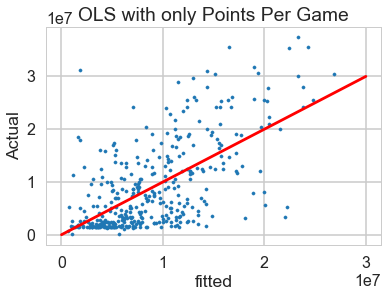

In [13]:
_ = plt.scatter(m1.fittedvalues, target, s = 10)
_ = plt.xlabel('fitted')
_ = plt.ylabel('Actual')
_ = plt.title('OLS with only Points Per Game')
_ = plt.plot([0,3e7],[0,3e7], color = 'r')

In [14]:
import sklearn.metrics as metrics
MSE = metrics.mean_squared_error(target, m1.fittedvalues)
MSE

40449420938585.6

In [15]:
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Q("2018-19")   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     256.0
Date:                Mon, 17 Sep 2018   Prob (F-statistic):           2.72e-44
Time:                        13:37:28   Log-Likelihood:                -6440.8
No. Observations:                 377   AIC:                         1.289e+04
Df Residuals:                     375   BIC:                         1.289e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.084e+05   6.36e+05      0.171      0.865   -1.14e+06    1.36e+06
Q("PS/G")   8.794e+05    5.5e+04     16.000      0.000    7.71e+05    9.87e+05
==============================================================================
Omnibus:                       41.097   Durbin-Watson:                   0.745
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.558
Skew:                           0.727   Prob(JB):                     7.08e-14
Kurtosis:                       4.318   Cond. No.                         22.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As you can see, the Mean-Squared Error is very high at 40$\times$ $10^{12}$ and the $R^2$ value is pretty low, not even hitting 0.5

### Trying OLS with 3 important variables

In [16]:
m2 = ols('Q("2018-19") ~ Q("PS/G") + GS + WS',stats2018).fit()

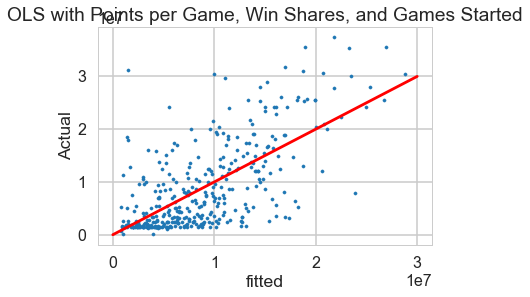

In [17]:
_ = plt.scatter(m2.fittedvalues, target, s = 10)
_ = plt.xlabel('fitted')
_ = plt.ylabel('Actual')
_ = plt.title('OLS with Points per Game, Win Shares, and Games Started')
_ = plt.plot([0,3e7],[0,3e7], color = 'r')

In [18]:
MSE2 = metrics.mean_squared_error(target, m2.fittedvalues)
MSE2

37094922259158.62

In [19]:
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Q("2018-19")   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     103.8
Date:                Mon, 17 Sep 2018   Prob (F-statistic):           7.23e-49
Time:                        13:37:29   Log-Likelihood:                -6424.5
No. Observations:                 377   AIC:                         1.286e+04
Df Residuals:                     373   BIC:                         1.287e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.755e+05   6.14e+05      0.775      0.439   -7.31e+05    1.68e+06
Q("PS/G")   4.994e+05   8.42e+04      5.933      0.000    3.34e+05    6.65e+05
GS          4.654e+04   1.61e+04      2.896      0.004    1.49e+04    7.81e+04
WS          6.373e+05   1.69e+05      3.776      0.000    3.05e+05    9.69e+05
==============================================================================
Omnibus:                       55.997   Durbin-Watson:                   0.841
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.614
Skew:                           0.860   Prob(JB):                     3.86e-22
Kurtosis:                       4.822   Cond. No.                         86.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Just by using a simple OLS with 3 varibles instead of 1, the $R^2$ value increase by half a decimal point. Neither is very good yet. One thing to note is that the **Skew** and the **Kurtosis** on this second OLS have increased. The higher kurtosis value means that it is more leptokurtic, resulting in more outliers. However, the Skewness is still less than the common threshold value of 1, which means that, though not symmetric, it is still not abundantly so. 

### Trying OLS with the second run in the Inferential Statistics portion of the project when I slowly removed a feature until they were all significant

In [20]:
m_all = ols('Q("2018-19") ~ G + AST + Q("PS/G") + WS + Q("AST%")',stats2018).fit()

In [21]:
MSE3 = metrics.mean_squared_error(target, m_all.fittedvalues)
MSE3

33763036149101.55

In [22]:
m_all.rsquared

0.5039385820964951

In [23]:
m_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Q("2018-19")   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     75.38
Date:                Mon, 17 Sep 2018   Prob (F-statistic):           2.30e-54
Time:                        13:37:30   Log-Likelihood:                -6406.8
No. Observations:                 377   AIC:                         1.283e+04
Df Residuals:                     371   BIC:                         1.285e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.782e+06   1.14e+06      5.970      0.000    4.55e+06    9.02e+06
G          -9.547e+04   1.66e+04     -5.748      0.000   -1.28e+05   -6.28e+04
AST         2.481e+06   6.09e+05      4.077      0.000    1.28e+06    3.68e+06
Q("PS/G")    4.58e+05   8.85e+04      5.173      0.000    2.84e+05    6.32e+05
WS          1.112e+06   1.74e+05      6.398      0.000    7.71e+05    1.45e+06
Q("AST%")  -4.218e+05   1.07e+05     -3.958      0.000   -6.31e+05   -2.12e+05
==============================================================================
Omnibus:                       26.562   Durbin-Watson:                   0.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.113
Skew:                           0.550   Prob(JB):                     2.37e-08
Kurtosis:                       4.013   Cond. No.                         256.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This time, the skew went down a lot and the Kurtosis went down a lot too. This leads me to believe that this may be the best model for me to use. The rsquared value increased by another 0.05, and the F-statistic decreased by another order of 5. The p-values all remain around 0, meaning they are all significant to the model. 

The largest coefficient belongs to the AST category, at 2,481,000, meaning if all else held constant, increasing your assists by 1, you will earn an added $2,481,000. This makes sense because, on average, players average a lot less assists than points and rebounds. The league leader in Assists last year was Russell Westbrook, who averaged 10.3, the only player with over 10 assists per game, while the highest points per game was James Harden with 30.4 and rebounds was Andre Drummond with 16.0. So pound for pound, assists are hardest to increase.

It was surprising to see that Games Played had a negative coefficient, meaning with all else held constant, increasing the number of games you play by 1 will decrease your salary by $95,470. I believe, that though this is an interesting revelation, it makes sense as a player who can average more points and get more WS in less games is more valuable than a player who can do the same over an increased number of games. 

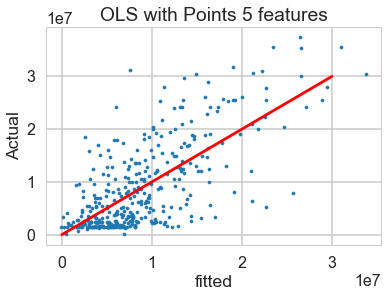

In [24]:
_ = plt.scatter(m_all.fittedvalues, target, s = 10)
_ = plt.xlabel('fitted')
_ = plt.ylabel('Actual')
_ = plt.title('OLS with Points 5 features')
_ = plt.plot([0,3e7],[0,3e7], color = 'r')

The scatter plot a bit better, with the flat floor ending sooner than it does on the previous 2. 

These "flat floors" where the fitted value is predicted to be higher than the actual, which is close to 0, is most likely caused by the minimum salary that player's can be paid, where player's with all different types of stats are all paid the same amount because of the minimum salary. 

### Using a Linear Regression model with the 5 features used in last OLS

In [25]:
X = stats2018[['G', 'AST', 'PS/G', 'WS' ,'AST%']]


In [26]:
from sklearn import linear_model
from sklearn import model_selection

reg = linear_model.LinearRegression()
#cv_results = cross_validation.cross_val_score(reg, X, target, cv = 5)

In [27]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, target, test_size = 0.3, random_state = 4)

In [28]:
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [29]:
y_pred = reg.predict(X_test).reshape(-1,1)

In [30]:
reg.score(X_test, y_test)

0.4367324089069351

In [31]:
MSE_lin = metrics.mean_squared_error(y_pred, y_test)
MSE_lin

37034208229841.25

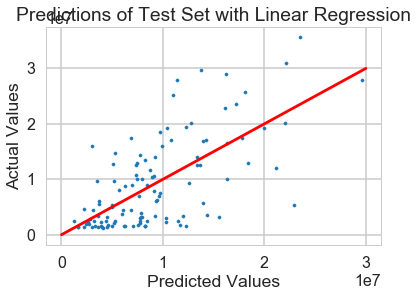

In [32]:
_ = plt.scatter(y_pred, y_test, s = 10)
_ = plt.xlabel('Predicted Values')
_ = plt.ylabel('Actual Values')
_ = plt.title('Predictions of Test Set with Linear Regression')
_ = plt.plot([0,3e7],[0,3e7], color = 'r')

Trying with cross validation. The purpose of this is that 'train_test_split' has very high variance, meaning the R^2 value can be very different depending on which datapoints were chosen for the training set and which were chosen for the testing set. Cross Validation does this multiple times using each section as a test set, so that every point is eventually used as both a testing and a training set. 

For some reason, running the Cross Validation with unshuffled data was resulting in extremely negative scores (the largest was -4,000), but after shuffling the data and then returning it to the cv, I recieved much better scores. 

In [33]:
cv = stats2018[['2018-19','G','PS/G','AST%','AST','WS']]
cv = cv.sample(frac = 1, random_state = 5)
X_cv = cv.drop('2018-19', axis = 1)
y_cv = cv['2018-19']

In [34]:
cv_results = model_selection.cross_val_score(reg, X_cv, y_cv, cv = 10)
cv_results.mean()

0.453372435591023

The results are scored with a R^2 metric, which is between 0 and 1, so this model is at least somewhat effective at predicting the salaries of the player. 

### Going to try Lasso Regression and Cross Validate for different Meta-Parameters

In [35]:
cvl = stats2018.sample(frac = 1, random_state =5)
X_las = cvl.drop(['2018-19', 'Pos','Name','Tm'], axis = 1)
y_las = cvl['2018-19']

In [36]:
for col in X_las.columns:
    X_las[col].fillna(X_las[col].median(), inplace = True)


In [37]:
alphas = [0.001,0.1, 1, 10, 50, 1000]

In [38]:
from sklearn.linear_model import Lasso

results = []

for alpha in alphas:
    lasso = Lasso(alpha = alpha, tol = 0.1)
    lasso_cv = model_selection.cross_val_score(lasso, X_las, y_las, cv= 10)
    print(lasso_cv.mean(), alpha)


0.8122079283184007 0.001
0.8122079841273282 0.1
0.8122084914677146 1
0.8122135635338106 10
0.8122360766219183 50
0.8127492189342982 1000


In [39]:
lasso_best = Lasso(alpha = 1000, tol = 0.1)
Xl_train, Xl_test, yl_train, yl_test = model_selection.train_test_split(X_las, y_las, test_size = 0.3, random_state = 4)
lasso_best.fit(Xl_train, yl_train)
y_pred_lasso = lasso_best.predict(Xl_test)

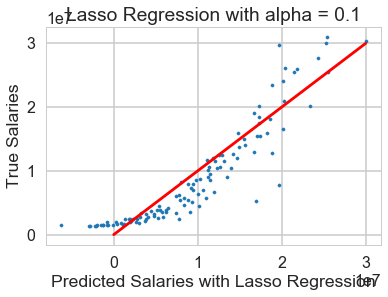

In [40]:
_ = plt.scatter(y_pred_lasso, yl_test, s = 10)
_ = plt.plot([0,3e7],[0,3e7], color = 'r')
_ = plt.xlabel('Predicted Salaries with Lasso Regression')
_ = plt.ylabel('True Salaries')
_ = plt.title('Lasso Regression with alpha = 0.1')

In [41]:
lasso_best.score(Xl_test,yl_test)

0.8271404067289335

In [42]:
results_lasso = model_selection.cross_val_score(lasso_best, X_las, y_las, cv= 10)
results_lasso.mean()

0.8127492189342982

In [43]:
MSE_lasso = metrics.mean_squared_error(y_pred_lasso, yl_test)
MSE_lasso

10855721229744.762

### Lasso Regression has improved the score to 0.827 (0.813 from Cross-Validation) from 0.45, and reduced the MSE to 10^12 which is still very high, but lower than 37^12 that I got from the normal Linear Regression.

As you can see, the regression seems to overpredict up to the $20,000,000 mark, where the Regression is generally predicting a bit higher than the true salaries. There are also a few points that were predicted as a negative salary. These salaries are all actually incredibly low. As we saw in the histograms and scatter plots, salaries had a hard floor because of the minimum salary that players can be paid, so even if their stats should make them be paid less, they were paid that amount, and the regression is predicted that salary as negative. 

### Using a Ridge Regression model 

In [44]:
from sklearn.linear_model import Ridge
ridge_best = Ridge(alpha = 1000, tol = 0.1)
Xr_train, Xr_test, yr_train, yr_test = model_selection.train_test_split(X_las, y_las, test_size = 0.3, random_state = 4)
ridge_best.fit(Xr_train, yr_train)
y_pred_ridge = ridge_best.predict(Xr_test)

In [45]:
ridge_best.score(Xr_test, yr_test)

0.8439333556610973

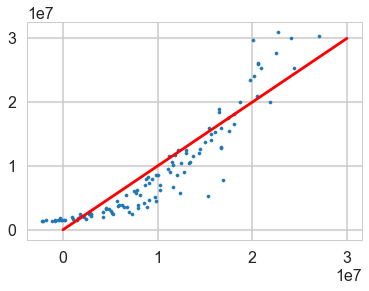

In [46]:
_ = plt.scatter(y_pred_ridge, yr_test, s = 10)
_ = plt.plot([0, 3e7],[0,3e7], color = 'r')

In [47]:
ridge_score = model_selection.cross_val_score(ridge_best, X_las, y_las, cv= 10)
ridge_score.mean()

0.8280941649813668

In [48]:
MSE_ridge = metrics.mean_squared_error(y_pred_ridge, yr_test)
MSE_ridge

9801110555363.27

#### The model yielded a better performing model, but not by much. The score was 0.828 in this regression. The MSE is also under 10^12